# Etudes de phénomènes aérospatiaux non identifiés (PAN) de 1910 à 2014

# Communiquez vos résultats - partie 6
# Modélisations

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-et-lecture-du-fichier-df_ufo_weather" data-toc-modified-id="Import-et-lecture-du-fichier-df_ufo_weather-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import et lecture du fichier df_ufo_weather</a></span></li><li><span><a href="#Modélisation-:" data-toc-modified-id="Modélisation-:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Modélisation :</a></span><ul class="toc-item"><li><span><a href="#Modèle-1-:-peut-on-prédire-si-un-phénomène-est-inexpliqué-ou-non?" data-toc-modified-id="Modèle-1-:-peut-on-prédire-si-un-phénomène-est-inexpliqué-ou-non?-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Modèle 1 : peut-on prédire si un phénomène est inexpliqué ou non?</a></span></li><li><span><a href="#Modèle-2:-En-fonction-de-la-météo,-quelle-forme-aura-le-phénomène?" data-toc-modified-id="Modèle-2:-En-fonction-de-la-météo,-quelle-forme-aura-le-phénomène?-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Modèle 2: En fonction de la météo, quelle forme aura le phénomène?</a></span></li><li><span><a href="#Modèle-3:-en-fonction-de-la-forme,-de-la-durée-du-phénomène,-dans-quel-pays-le-phénomène-sera-le-plus-observé" data-toc-modified-id="Modèle-3:-en-fonction-de-la-forme,-de-la-durée-du-phénomène,-dans-quel-pays-le-phénomène-sera-le-plus-observé-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Modèle 3: en fonction de la forme, de la durée du phénomène, dans quel pays le phénomène sera le plus observé</a></span></li></ul></li></ul></div>

## Import et lecture du fichier df_ufo_weather

Importation des librairies nécessaires à l'exécution du code

In [1]:
# Importation des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re
import datetime

# Librairies statistiques
from scipy.stats import chi2_contingency
import scipy.stats as stats
from scipy.stats import ks_2samp

# Librairies visualisation
import folium
from folium import Choropleth
from folium.plugins import HeatMap
from urllib.request import urlopen
import json
import plotly.express as px
import plotly.figure_factory as ff

# Librairies classement
from sklearn.cluster import KMeans

# Librairie modelisation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage,  fcluster, centroid
from sklearn import decomposition
from yellowbrick.cluster import KElbowVisualizer

# librairies pour les modèles
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from yellowbrick.model_selection import FeatureImportances
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
#  version de pandas
print(f'version pandas : {pd.__version__}')
#  version de numpy
print(f'version numpy : {np.__version__}')
#  version de folium
print(f'version folium : {folium.__version__}')

version pandas : 1.1.3
version numpy : 1.19.2
version folium : 0.12.1


In [3]:
def calculate_accuracy(classifier, X_train, X_test, y_train, y_test):
    """Calcul de l'accuracy du modèle.
    
    Parameters
    ----------
    classifier: modèle
    X_train, y_train: données d'entrainement
    X_test, y_test: données de test
    
    Returns
    -------
    accuracy_train, accuracy_test, classifier     
    """
    
    classifier.fit(X_train, y_train)
    y_pred_train = classifier.predict(X_train)
    y_pred_test = classifier.predict(X_test)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    print('Train accuracy:', '{:.3f}'.format(accuracy_train),
          'Test accuracy:', '{:.3f}'.format(accuracy_test))
    return accuracy_train, accuracy_test, classifier

In [4]:
ENCODAGE = 'UTF-8'

In [5]:
sns.set(style="darkgrid")

Import du dataset `df_ufo_weather`

In [6]:
df_ufo_weather = pd.read_csv("df_ufo_weather.csv",
                             encoding=ENCODAGE,
                             parse_dates=['reportedTimestamp',
                                          'eventDate',
                                          'eventTime']).copy()
df_ufo_weather.head(2)

,reportedTimestamp,eventDate,eventTime,UFO_shape,duration,witnesses,weather,latitude,longitude,physicalEvidence,contact,researchOutcome,year,month,day,hour
0,1977-04-04 04:02:00,1977-03-31,1900-01-01 23:46:00,circle,4,1,rain,47.329444,-122.578889,N,N,explained,1977,4,0,4
1,1982-11-22 02:06:00,1982-11-15,1900-01-01 22:04:00,disk,4,1,partly cloudy,52.664913,-1.034894,Y,N,explained,1982,11,0,2


Import du dataset population-évènement

In [7]:
df_ufo_pop_tot = pd.read_csv("df_ufo_pop_tot.csv",
                             encoding=ENCODAGE,
                             parse_dates=['dates_time']).copy()
df_ufo_pop_tot.head(2)

,dates_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,latitude,longitude,state,year,month,hour,day,cat_UFO_shape,log_length_of_encounter_seconds,gpe_duration,population
0,1955-10-10 17:00:00,Chester,CH,United Kingdom,circle,20.0,53.200000,-2.916667,North West of England,1955,10,17,0,ovoid_shape,2.995732,<60s,7341196
1,1965-10-10 21:00:00,Penarth,CF,United Kingdom,circle,180.0,51.434722,-3.180000,Wales,1965,10,21,6,ovoid_shape,5.192957,61-300s,3152879


Items de la variable `contact`

In [8]:
df_ufo_weather.contact.unique()

array(['N', 'Y'], dtype=object)

Items de la variable `UFO_shape`

In [9]:
df_ufo_weather.UFO_shape.unique()

array(['circle', 'disk', 'sphere', 'triangle', 'light', 'pyramid',
       'square', 'box', 'oval'], dtype=object)

Items de la variable `weather`

In [10]:
df_ufo_weather.weather.unique()

array(['rain', 'partly cloudy', 'clear', 'mostly cloudy', 'fog', 'snow',
       'stormy'], dtype=object)

Regroupement des données par groupes

## Modélisation :  


In [11]:
df_ufo_weather['researchOutcome'].unique()

array(['explained', 'probable', 'unexplained'], dtype=object)

Remplacement des variables catégorielles par des valeurs numériques

In [12]:
# Préparation des valeurs pour une modélisation
# Remplacement des valeurs catégorielles par des valeurs numériques
ufo_shape_list = ['circle', 'disk', 'sphere', 'triangle',
                  'light', 'pyramid', 'square', 'box', 'oval']

ufo_shape_num_list = [0, 1, 2, 3,
                      4, 5, 6, 7, 8]

weather_list = ['rain', 'partly cloudy', 'clear',
                'mostly cloudy', 'fog', 'snow', 'stormy']

weather_num_list = [0, 1, 2,
                    3, 4, 5, 6]

df_ufo_weather['UFO_shape'].replace(ufo_shape_list,
                                    ufo_shape_num_list,
                                    inplace=True)

df_ufo_weather['weather'].replace(weather_list,
                                  weather_num_list,
                                  inplace=True)

#  Modification de la variable researchOutcome en:
# 1 (expliqué), et 0 (inexpliqué)
df_ufo_weather['researchOutcome'] = df_ufo_weather['researchOutcome'].map(
    {'explained': 1,
     'probable': 0,
     'unexplained': 0})

# Modification de "physicalEvidence" et "contact"
col_list = ['physicalEvidence', 'contact']
for col in col_list:
    df_ufo_weather[col] = df_ufo_weather[col].map(
        {'Y': 1,
         'N': 0}
    )

### Modèle 1 : peut-on prédire si un phénomène est inexpliqué ou non?

Il y a 2 réponses possibles:
- 0 : phénomène inexpliqué
- 1 : phénomène expliqué

Nous allons donc appliquer un modèle logistique

In [13]:
df_ufo_weather['researchOutcome'].unique()

array([1, 0], dtype=int64)

Standardisation des données

Récupération des colonnes pertinentes

In [14]:
# Récupération des colonnes pertinentes
df_ufo_weather_modwe = df_ufo_weather.drop(['reportedTimestamp',
                                            'eventDate',
                                            'eventTime',
                                            'latitude',
                                            'longitude',
                                            'month',
                                            'year',
                                            'hour'
                                            ],
                                           axis=1)

In [15]:
y = df_ufo_weather_modwe['researchOutcome']
X = df_ufo_weather_modwe.drop('researchOutcome', axis=1)

Division du dataset en données d'entrainement et données de test (20% pour le test, 80% pour l'entrainement)

In [16]:
#  Division du dataset en données d'entrainement et données de test
# (20% pour test, 80% pour l'entrainement)
x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=42)
print(f'données d\'entrainement: {x_train.shape}')
print(f'données de test: {x_test.shape}')

données d'entrainement: (14398, 7)
données de test: (3600, 7)


In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

Standardisation

In [18]:
# Données centrées et réduites
sc = StandardScaler()

In [19]:
# Calcul de la moyenne et de l'écart type uniquement sur le dataset train (et pas celui de test)
sc.fit(x_train)

StandardScaler()

In [20]:
x_trainSc = sc.transform(x_train)

Vérification de la standardisation par la moyenne

In [21]:
# Vérification moyenne
np.mean(x_trainSc, axis=0)

array([ 4.44150897e-17, -5.82331177e-17,  1.07089716e-16,  8.88301795e-17,
       -3.94800798e-17, -8.88301795e-18, -4.34280878e-17])

Vérification de la standardisation par l'écart type

In [22]:
# Vérification écart type
np.std(x_trainSc, axis=0)

array([1., 1., 1., 1., 1., 1., 1.])

In [23]:
# Normalisation du dataset test avec la moyenne et l'écart type calculé précédemment
x_testSc = sc.transform(x_test)

Création du modèle logistique

In [24]:
# Création du model
model_reg = LogisticRegression(random_state=42)
model_reg.fit(x_trainSc, y_train)

LogisticRegression(random_state=42)

Prédiction

In [25]:
#  test du model donc prévision
predictions = model_reg.predict(x_testSc)
print(predictions)
print(y_test)

[1 1 1 ... 1 0 1]
10909    1
5904     1
11621    1
15109    0
11520    0
        ..
732      0
12654    0
5005     1
13970    1
16727    1
Name: researchOutcome, Length: 3600, dtype: int64


In [26]:
#  Matrice de confusion
mc = confusion_matrix(y_test, predictions)
mc

array([[ 797,  235],
       [ 123, 2445]], dtype=int64)

Matrice de confusion

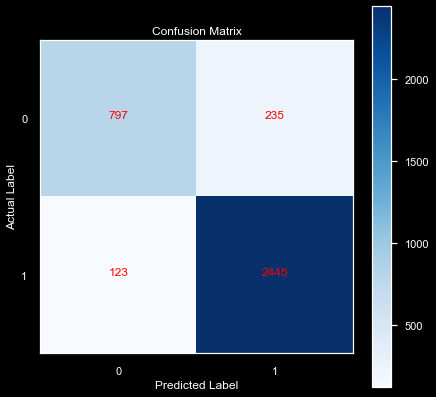

In [27]:
import itertools
# with plt.style.context(('ggplot', 'seaborn')):dark_background
with plt.style.context(('dark_background')):
    fig = plt.figure(figsize=(7, 7), num=1)
    plt.imshow(mc, interpolation='nearest', cmap=plt.cm.Blues)
    plt.xticks([0, 1], [0, 1])
    plt.yticks([0, 1], [0, 1])
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    for i, j in itertools.product(range(mc.shape[0]), range(mc.shape[1])):
        plt.text(j, i, mc[i, j], horizontalalignment="center", color="red")
    plt.grid(None)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.savefig("Confusion expliquer ou non.jpg")

Le modèle doit être performant pour prédire les phénomènes expliqués

In [28]:
# Métrics avec "calculate_accuracy" fonction utilisant "accuracy_score"
accuracy_train, accuracy_test, trained_model_reg = calculate_accuracy(
    model_reg, x_trainSc, x_testSc, y_train, y_test)

Train accuracy: 0.882 Test accuracy: 0.901


In [29]:
predictionsTrain = model_reg.predict(x_trainSc)
print(classification_report(y_train, predictionsTrain))
print('accuracy_score : {}'.format(accuracy_score(y_train, predictionsTrain)))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78      4146
           1       0.90      0.94      0.92     10252

    accuracy                           0.88     14398
   macro avg       0.87      0.84      0.85     14398
weighted avg       0.88      0.88      0.88     14398

accuracy_score : 0.8815113210168078


La précision du modèle pour repérer un phénomène inexpliqué est de 85% contre 90% pour reconnaître un phénomène expliqué

 Importance des différentes variables sur le modèle logistique

duration, Score: -2.11926
witnesses, Score: -0.04075
weather, Score: -0.24463
physicalEvidence, Score: -0.26900
contact, Score: -0.14219
researchOutcome, Score: -0.13408
day, Score: -0.05836


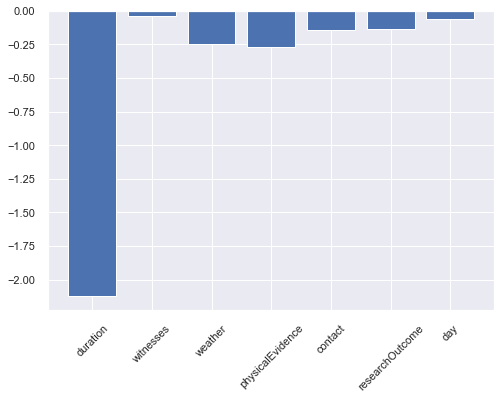

In [30]:
importance = model_reg.coef_[0]
for i, imp in enumerate(importance):
    print('%s, Score: %.5f' %
          (df_ufo_weather_modwe.iloc[:, 1:].columns[i], imp))
plt.bar(df_ufo_weather_modwe.iloc[:, 1:].columns,
        importance)
plt.xticks(rotation=45)
plt.show()

Autre visualisation

La variable `duration` a le plus fort impact dans le modèle.

Courbe ROC du modèle logistique

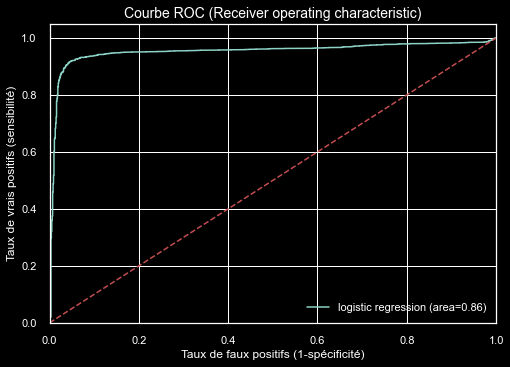

In [31]:
# Courbe ROC
logit_roc_auc = roc_auc_score(y_test, predictions)
y_pred_proba = model_reg.predict_proba(x_testSc)[::,  1]                            
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
with plt.style.context(('dark_background')):
    plt.figure()
    plt.plot(fpr, tpr, label='logistic regression (area=%0.2f)' %logit_roc_auc)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taux de faux positifs (1-spécificité)', size=12)
    plt.ylabel('Taux de vrais positifs (sensibilité)', size=12)
    plt.title('Courbe ROC (Receiver operating characteristic)', size=14)
    plt.legend(loc='lower right')
    plt.savefig("courbe roc variables (3)title.jpg")
    plt.show()

Le modèle est efficace à 88% sur les données test avec lemodèle logistique

Avec un modèle type **randomForest**

Matrice de confusion

In [32]:
# RandomForest
rf = RandomForestClassifier(random_state=42).fit(x_trainSc, y_train)
y_pred_rf = rf.predict(x_testSc)
display(pd.crosstab(y_test, y_pred_rf))
print('Via random forest, accuracy :', accuracy_score(y_test, y_pred_rf))

col_0,0,1
researchOutcome,,
0,975,57
1,120,2448


Via random forest, accuracy : 0.9508333333333333


In [33]:
#  Matrice de confusion
mc_rf = confusion_matrix(y_test, y_pred_rf)
mc_rf

array([[ 975,   57],
       [ 120, 2448]], dtype=int64)

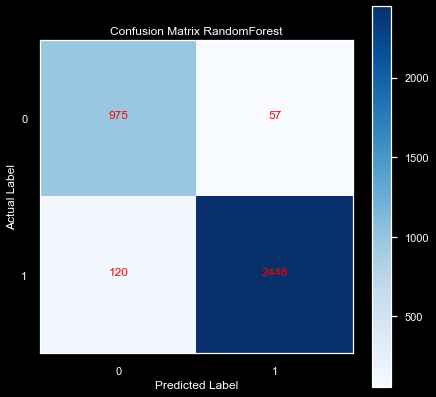

In [34]:
import itertools
# with plt.style.context(('ggplot', 'seaborn')):dark_background
with plt.style.context(('dark_background')):
    fig = plt.figure(figsize=(7, 7), num=1)
    plt.imshow(mc_rf, interpolation='nearest', cmap=plt.cm.Blues)
    plt.xticks([0, 1], [0, 1])
    plt.yticks([0, 1], [0, 1])
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    for i, j in itertools.product(range(mc_rf.shape[0]), range(mc_rf.shape[1])):
        plt.text(j, i, mc_rf[i, j], horizontalalignment="center", color="red")
    plt.grid(None)
    plt.title('Confusion Matrix RandomForest')
    plt.colorbar()
    plt.savefig("Confusion expliquer ou non randomForest.jpg")

In [35]:
#  Métrics avec "calculate_accuracy" fonction utilisant "accuracy_score"
accuracy_train, accuracy_test, trained_model_reg = calculate_accuracy(
    rf, x_trainSc, x_testSc, y_train, y_test)

Train accuracy: 0.999 Test accuracy: 0.951


Le modèle a une accuracy sur les données test de 94.4%. C'est mailleur qu'avec le modèle logistique.

In [36]:
predictionsTrain = rf.predict(x_trainSc)
print(classification_report(y_train, predictionsTrain))
print('accuracy_score : {}'.format(accuracy_score(y_train, predictionsTrain)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4146
           1       1.00      1.00      1.00     10252

    accuracy                           1.00     14398
   macro avg       1.00      1.00      1.00     14398
weighted avg       1.00      1.00      1.00     14398

accuracy_score : 0.9986803722739269


Courbe ROC du modèle RandomForest

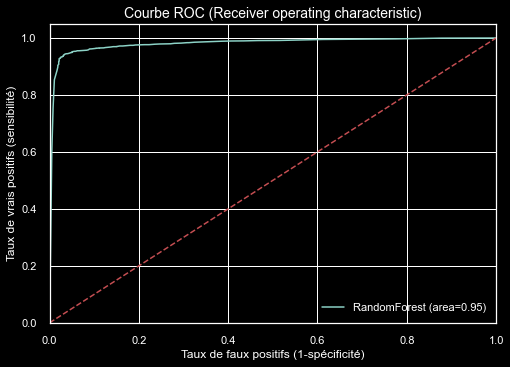

In [37]:
# Courbe ROC
logit_roc_auc = roc_auc_score(y_test, y_pred_rf)
y_pred_proba = rf.predict_proba(x_testSc)[::, 1]                            
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
with plt.style.context(('dark_background')):
    plt.figure()
    plt.plot(fpr, tpr, label='RandomForest (area=%0.2f)' %logit_roc_auc)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taux de faux positifs (1-spécificité)', size=12)
    plt.ylabel('Taux de vrais positifs (sensibilité)', size=12)
    plt.title('Courbe ROC (Receiver operating characteristic)', size=14)
    plt.legend(loc='lower right')
    plt.savefig("courbe roc variables rf(3)title.jpg")
    plt.show()

Le modèle RandomForest est meilleur que le précédent

**Combien de variables doit-on introduire dans le modèle ?**

Calcul des coefficients bêta pour le modèle logistique

In [38]:
# coef bêta
coefficients = pd.DataFrame(model_reg.coef_[0],
                            index=df_ufo_weather_modwe.iloc[:, 1:].columns,
                            columns=['beta']
                            )
coefficients.head(20)

,beta
duration,-2.119258
witnesses,-0.040748
weather,-0.244634
physicalEvidence,-0.268996
contact,-0.142192
researchOutcome,-0.134082
day,-0.058361


In [39]:
coefficients = coefficients.sort_values(by='beta', ascending=False)
coefficients = coefficients.rename_axis('variable').reset_index()
coefficients

,variable,beta
0,witnesses,-0.040748
1,day,-0.058361
2,researchOutcome,-0.134082
3,contact,-0.142192
4,weather,-0.244634
5,physicalEvidence,-0.268996
6,duration,-2.119258


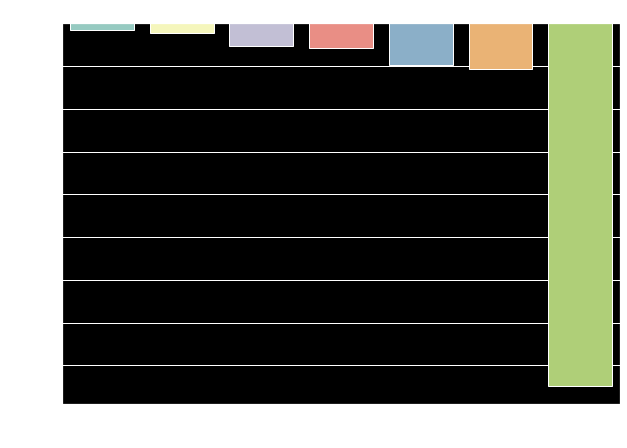

In [40]:
plt.figure(figsize=(10, 7))
plt.style.use('dark_background')
sns.barplot(x='variable', y='beta', data=coefficients)
plt.title('Influence des variables sur le modèle', size=14)
plt.xlabel('variable', size=12)
plt.ylabel('coefficient bêta')
plt.show()

La variable "duration" a une très forte influence sur le modèle

In [41]:
n_features = 4
coefficients['abs_beta'] = coefficients['beta'].abs()  # calcul des valeurs absolues des beta
coefficients = coefficients.sort_values(by='abs_beta',
                                        ascending=False)  # tri par valeurs absolues
top_features = coefficients.head(
    n_features).variable.values  # liste de n meilleurs features
print('Top features LR:', top_features)

Top features LR: ['duration' 'physicalEvidence' 'weather' 'contact']


Accuracy de modèle en fonction des variables utilisées

In [42]:
for i in range(len(top_features)):
    selected_features = top_features[0:i+1]
    print(selected_features)
    accuracy_train, accuracy_test, trained_model_reg = calculate_accuracy(
        model_reg, x_trainSc[:, i].reshape(x_trainSc.shape[0], 1),
        x_testSc[:, i].reshape(x_testSc.shape[0], 1),
        y_train, y_test
    )

['duration']
Train accuracy: 0.852 Test accuracy: 0.870
['duration' 'physicalEvidence']
Train accuracy: 0.712 Test accuracy: 0.713
['duration' 'physicalEvidence' 'weather']
Train accuracy: 0.712 Test accuracy: 0.713
['duration' 'physicalEvidence' 'weather' 'contact']
Train accuracy: 0.712 Test accuracy: 0.713


Le modèle est amélioré en ne prenant que "duration" et "latitude" comme variable

### Modèle 2: En fonction de la météo, quelle forme aura le phénomène?

Dataset d'étude 

In [43]:
# Récupération des colonnes pertinentes
df_ufo_weather_mod = df_ufo_weather[['UFO_shape', 'duration', 'weather',
                                     'latitude', 'longitude', 'year']]

In [44]:
df_ufo_weather_mod.head(2)

,UFO_shape,duration,weather,latitude,longitude,year
0,0,4,0,47.329444,-122.578889,1977
1,1,4,1,52.664913,-1.034894,1982


Modèle de classification K-NN

In [45]:
model_meteo = KNeighborsClassifier()

In [46]:
y = df_ufo_weather_mod['UFO_shape']
X = df_ufo_weather_mod.drop('UFO_shape', axis=1)

Précision du modèle

In [47]:
model_meteo.fit(X, y)
model_meteo.score(X, y)

0.4972219135459495

Le modèle n'a pas une bonne précision. Il n'effectue pas de bonnes prédictions

Standardisation des données

In [48]:
y = df_ufo_weather_mod['UFO_shape']
X = df_ufo_weather_mod.drop('UFO_shape', axis=1)

80% de données d'entrainement et 20% de données test

In [49]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

Création du modèle k-NN

In [50]:
knn_weather = KNeighborsClassifier(n_neighbors=3)
knn_weather.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [51]:
error = 1 - knn_weather.score(x_test, y_test)
print('Erreur: %f' % error)

Erreur: 0.685000


Détermination du nombre de voisins optimal pour le modèle

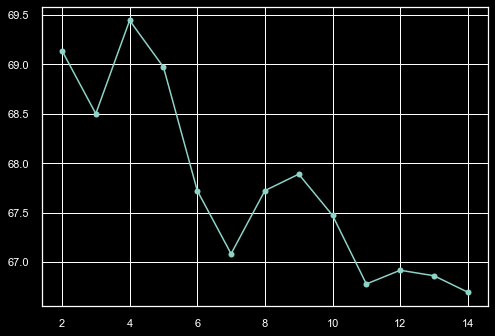

In [52]:
errors = []
for k in range(2,15):
    knn = KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(x_train, y_train).score(x_test, y_test)))
plt.plot(range(2,15), errors, 'o-')
plt.show()

On récupère le classifieur le plus performant (11 voisins)

In [53]:
# On récupère le classifieur le plus performant
knnBis = KNeighborsClassifier(11)
knnBis.fit(x_train, y_train)

# On récupère les prédictions sur les données test
predicted = knnBis.predict(x_test)

In [54]:
error = 1 - knnBis.score(x_test, y_test)
print('Erreur: %f' % error)

Erreur: 0.667778


Le modèle est toujours aussi mauvais

### Modèle 3: en fonction de la forme, de la durée du phénomène, dans quel pays le phénomène sera le plus observé 

Modèle k-NN

Dataset utilisé pour la modélisation

In [55]:
df_ufo_pop_tot.head(2)

,dates_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,latitude,longitude,state,year,month,hour,day,cat_UFO_shape,log_length_of_encounter_seconds,gpe_duration,population
0,1955-10-10 17:00:00,Chester,CH,United Kingdom,circle,20.0,53.200000,-2.916667,North West of England,1955,10,17,0,ovoid_shape,2.995732,<60s,7341196
1,1965-10-10 21:00:00,Penarth,CF,United Kingdom,circle,180.0,51.434722,-3.180000,Wales,1965,10,21,6,ovoid_shape,5.192957,61-300s,3152879


Catégories de forme de PAN du dataset

In [56]:
df_ufo_pop_tot.cat_UFO_shape.unique()

array(['ovoid_shape', 'cylinder_shape', 'angular_shape',
       'formation_shape', 'changing_shape', 'other_shape', 'light_shape'],
      dtype=object)

Pays représentés dans le dataset

In [57]:
df_ufo_pop_tot.country.unique()

array(['United Kingdom', 'USA', 'Canada'], dtype=object)

Préparation des données à la modélisation (numérisation des variables catégorielles)

In [58]:
# Récupération des colonnes pertinentes
df_ufo_country_mod = df_ufo_pop_tot[['cat_UFO_shape',
                                     'log_length_of_encounter_seconds',
                                     'month',
                                     'country']]
# Suppression des valeurs null
df_ufo_country_mod.dropna(axis=0, inplace=True)

# Préparation des valeurs pour une modélisation
# Remplacement des valeurs catégorielles par des valeurs numériques

cat_UFO_shape_list = ['ovoid_shape',
                      'cylinder_shape',
                      'angular_shape',
                      'formation_shape',
                      'changing_shape',
                      'other_shape',
                      'light_shape']

cat_UFO_shape_num_list = [0,
                          1,
                          2,
                          3,
                          4,
                          5,
                          6]

country_list = ['United Kingdom',
                'USA',
                'Canada']

country_num_list = [0,
                    1,
                    2]

df_ufo_country_mod['cat_UFO_shape'].replace(cat_UFO_shape_list,
                                            cat_UFO_shape_num_list,
                                            inplace=True
                                            )

df_ufo_country_mod['country'].replace(country_list,
                                      country_num_list,
                                      inplace=True
                                      )

Dataset de modélisation 

In [59]:
df_ufo_country_mod.tail(2)

,cat_UFO_shape,log_length_of_encounter_seconds,month,country
67272,5,4.499810,9,2
67273,6,5.192957,9,2


Création du modèle k-NN

In [60]:
model_country_knn = KNeighborsClassifier()

In [61]:
y = df_ufo_country_mod['country']
X = df_ufo_country_mod.drop('country', axis=1)

Satndardisation des données

In [62]:
#  Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Vérification de la standardisation (moyenne = 0)

In [63]:
# Vérification de la standardisation (moyenne = 0)
X_scaled.mean(axis=0)

array([ 6.84412541e-17,  5.70343784e-17, -1.18293526e-17])

Vérification de la standardisation (écart type = 1)

In [64]:
# Vérification de la standardisation (écart type = 1)
X_scaled.std(axis=0)

array([1., 1., 1.])

Modélisation avec des données splitées

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
# Entrainement du modèle
model_country_knn.fit(X_train, y_train)
print(f'score: {model_country_knn.score(X_test, y_test)}')

score: 0.9182472204054938


Le modèle (avec jeu de données test) a une précision de 92%.  
Ce modèle nous permet donc de prédire le pays où le phénomène aura le plus de chance de se produire en fonction de la forme, de la durée du phénomène et du mois d'observation.

In [66]:
def ufo_country(model, cat_UFO_shape, log_length_of_encounter_seconds, month):
    """Fonction de prédiction du modèle k-NN
    Parameters
    ----------
    model: nom du modèle
    cat_UFO_shape: catégorie de forme du phénomène
    float 
        log_length_of_encounter_seconds: log de la durée du phénomène
    int
        month: mois d'observation
    
    Returns
    -------
    Le code du pays prédit et son appellation
    """
    
    x = np.array([cat_UFO_shape,
                  log_length_of_encounter_seconds,
                  month]
                 ).reshape(1, 3)
    country_list = ['United Kingdom',
                    'USA',
                    'Canada']
    print(f'country : {model.predict(x)}')
    print(f'country : {country_list[int(model.predict(x))]}')
#     print(f'Probabilité de prédiction du modèle : {model.predict_proba(x)}')

model, cat_UFO_shape, log_length_of_encounter_seconds, month

In [67]:
ufo_country(model_country_knn, 5, 2.302585, 9)

country : [1]
country : USA


Modélisation sans données d'entrainement

In [68]:
model_country = KNeighborsClassifier()

In [69]:
model_country.fit(X, y)

KNeighborsClassifier()

Précision du modèle (sans split des données)

In [70]:
model_country.score(X, y)

0.920429883758956

Le modèle a une précision de 89.43%.  
Ce modèle nous permet donc de prédire le pays où le phénomène aura le plus de chance de se produire en fonction de la forme, de la durée du phénomène et du mois d'observation.

Création d'une fonction qui nous permet de déterminer le pays d'observation

Application de la prédiction avec modèle sans split des données

In [71]:
ufo_country(model_country, 6, 240, 9)

country : [1]
country : USA


Autre modèle

In [72]:
df_ufo_country_mod.tail(2)

,cat_UFO_shape,log_length_of_encounter_seconds,month,country
67272,5,4.499810,9,2
67273,6,5.192957,9,2


In [73]:
df_ufo_country_mod.shape

(67274, 4)

In [74]:
y = df_ufo_country_mod['country']
X = df_ufo_country_mod.drop('country', axis=1)

80% de données d'entrainement et 20% de données test

In [75]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8)

Création du modèle

In [76]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3)

In [77]:
knn.score(X_test, y_test)

0.9152743920566027

In [78]:
predicted = knn.predict(xtest)

In [79]:
xtest

,cat_UFO_shape,log_length_of_encounter_seconds,month
61929,2,5.192957,9
18295,3,5.703782,12
19967,0,4.094345,1
56836,6,5.703782,8
28318,0,4.094345,3
...,...,...,...
12258,5,2.302585,11
5319,2,4.787492,10
36964,6,5.192957,5
4480,5,6.396930,10


In [80]:
np.unique(predicted)

array([0, 1, 2], dtype=int64)

In [81]:
x = np.array([6, 120, 10]).reshape(1, 3)

In [82]:
pred = knn.predict(x)
pred

array([1], dtype=int64)

In [83]:
knn.score(X_test, y_test)

0.9152743920566027

In [84]:
error = 1 - knn.score(X_test, y_test)
print('Erreur: %f' % error)

Erreur: 0.084726


Détermination du nombre de voisins optimal pour le modèle

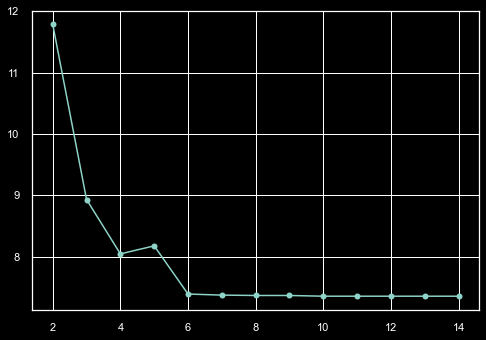

In [85]:
errors = []
for k in range(2, 15):
    knn = KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(X_train, y_train).score(X_test, y_test)))
plt.style.use('dark_background')
plt.plot(range(2, 15), errors, 'o-')
plt.show()

Le nombre de voisins optimal est de 8

In [86]:
# On récupère le classifieur le plus performant
knn = KNeighborsClassifier(8)
knn.fit(X_train, y_train)
# On récupère les prédictions sur les données test
predicted = knn.predict(X_test)

In [87]:
np.size(predicted)

16819

In [88]:
np.unique(predicted)

array([0, 1], dtype=int64)

In [89]:
error = 1 - knn.score(X_test, y_test)
print('Erreur: %f' % error)

Erreur: 0.073667


Validation curve pour évaluer le meilleur modèle

In [90]:
from sklearn.model_selection import validation_curve

In [91]:
# Setting the range for the parameter (from 1 to 7)
parameter_range = np.arange(1, 10, 1) 
# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
train_score, test_score = validation_curve(KNeighborsClassifier(),
                                           X_train,
                                           y_train,
                                           param_name="n_neighbors",
                                           param_range=parameter_range,
                                           cv=5, scoring="accuracy")

In [92]:
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis=1)
std_train_score = np.std(train_score, axis=1) 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis=1)
std_test_score = np.std(test_score, axis=1)

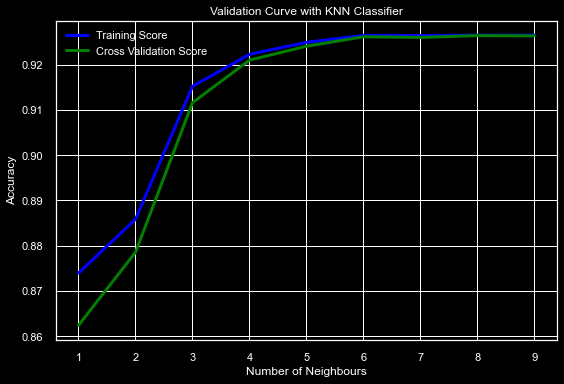

In [93]:
# Plot mean accuracy scores for training and testing scores
plt.style.use('dark_background')
plt.plot(parameter_range, mean_train_score,
         label="Training Score",
         linewidth=3,
         color='blue')
plt.plot(parameter_range, mean_test_score,
         label="Cross Validation Score",
         linewidth=3,
         color='green')

# Creating the plot
plt.title("Validation Curve with KNN Classifier")
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.legend(loc='best')
plt.show()

La modèle est idéal pour 4 voisins